In [8]:
import PIL
import numpy as np
from scipy.ndimage import filters

CPU times: user 56.3 ms, sys: 8.04 ms, total: 64.4 ms
Wall time: 64.4 ms


In [9]:
%time grayscale = Image.open("./Pictures/alcatraz1.jpg").convert('L')
im = np.array(grayscale)
#Sobel derivative filters
imx = np.zeros(im.shape)
filters.sobel(im,1,imx)
imy = np.zeros(im.shape)
filters.sobel(im,0,imy)
magnitude = np.sqrt(imx**2+imy**2)


NameError: name 'Image' is not defined

NameError: name 'grayscale' is not defined

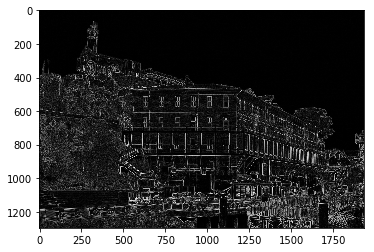

In [21]:
import cv2
import matplotlib.pyplot as plot
%matplotlib inline

im1 = cv2.imread('./Pictures/alcatraz1.jpg')
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
#plot.imshow(im1)
plot.imshow(magnitude,'gray')

In [32]:
a = np.random.randn(3,3)
print(a)
print(a.T)
a?

[[-1.79917559 -2.01861694 -2.31869222]
 [-1.03720893  1.44202191 -0.12870537]
 [-1.13930315  2.25546206 -1.86660605]]
[[-1.79917559 -1.03720893 -1.13930315]
 [-2.01861694  1.44202191  2.25546206]
 [-2.31869222 -0.12870537 -1.86660605]]


In [36]:
k = ((1,1,1),(0,0,0),(-1,-1,-1))
knp = np.array(k)
print(knp)
print(knp.T)

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


In [39]:
%time dot = np.dot(knp.T,knp)
dot

CPU times: user 30 µs, sys: 2 µs, total: 32 µs
Wall time: 34.1 µs


array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

True

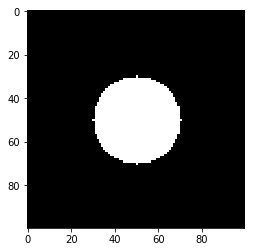

In [41]:
import cv2
import numpy as np

# Create a dummy input image.
canvas = np.zeros((100, 100), dtype=np.uint8)
canvas = cv2.circle(canvas, (50, 50), 20, (255,), -1)
plot.imshow(canvas,'gray')

kernel = np.array([[-1, -1, -1],
                   [-1, 4, -1],
                   [-1, -1, -1]])

dst = cv2.filter2D(canvas, -1, kernel)
cv2.imwrite("./filtered.png", dst)

(1296, 1936, 3)
((-1, 0, 1), (-1, 0, 1), (-1, 0, 1))
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [1.57  1.57  0.    ... 0.    0.    0.   ]
 [1.57  1.57  1.534 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


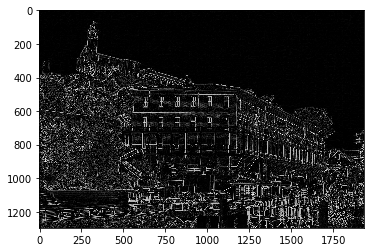

In [80]:
import cv2
import numpy as np

img = cv2.imread("./Pictures/alcatraz1.jpg") # Read in the image
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = img[:,:,0]

ky = ((-1,-1,-1),(0,0,0),(1,1,1))
kx = ((-1,0,1),(-1,0,1),(-1,0,1))
print(kx)

kx = np.array(kx)
ky = np.array(ky)
print(kx)
print(ky)

dy = cv2.filter2D(gray,-1,ky) # Find x and y gradients
dx = cv2.filter2D(gray,-1,kx) # Find x and y gradients
#print(dx)

#dy = cv2.Sobel(gray,cv2.CV_64F,0,1)

# Find magnitude and angle
magnitude = np.sqrt(dx**2.0 + dy**2.0)
angle = np.arctan2(dy,dx) #* (180 / np.pi)
plot.imshow(magnitude,'gray')
#plot.imshow(angle,'gray')
print(angle)

In [3]:
from numpy import *

def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):
    """ 
    An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
    using the numerical procedure presented in eq (11) A. Chambolle (2005).

    Input: 
    noisy input image (grayscale), initial guess for U, weight of
    the TV-regularizing term, steplength, tolerance for stop criterion.

    Output: 
    denoised and detextured image, texture residual. """

    m,n = im.shape #size of noisy image

    # initialize

    U = U_init

    Px = im #x-component to the dual field
    Py = im #y-component of the dual field
    error = 1

    while (error > tolerance):
        Uold = U

        # gradient of primal variable
        GradUx = roll(U,-1,axis=1)-U # x-component of U’s gradient
        GradUy = roll(U,-1,axis=0)-U # y-component of U’s gradient

        # update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = maximum(1,sqrt(PxNew**2+PyNew**2))
        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)

        # update the primal variable
        RxPx = roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = roll(Py,1,axis=0) # right y-translation of y-component
        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        U = im + tv_weight*DivP # update of the primal variable

        # update of error
        error = linalg.norm(U-Uold)/sqrt(n*m);

    return U,im-U # denoised image and texture residual

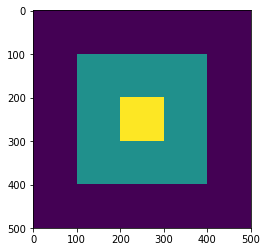

In [5]:
import matplotlib.pyplot as plot
%matplotlib inline

from numpy import *
from numpy import random
from scipy.ndimage import filters

#import rof

# create synthetic image with noise
im = zeros((500,500))
im[100:400,100:400] = 128
im[200:300,200:300] = 255
plot.imshow(im)

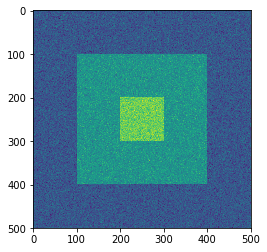

In [6]:
im = im + 30*random.standard_normal((500,500))
plot.imshow(im)



/home/resident/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


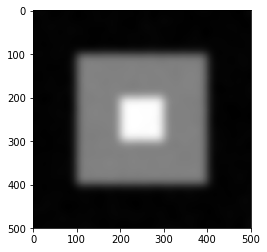

In [20]:
G = filters.gaussian_filter(im,10)
plot.imshow(G,'gray')

import scipy.misc
scipy.misc.imsave("synth_gaussian.pdf",G)


[[ 21.05309828 -11.38548634  -4.50023887 ...   3.73725261   3.23160653
   10.58435684]
 [-59.0428066  -14.99115258 -29.09975528 ...   4.35923378   7.79563277
    2.5450297 ]
 [  8.60854027 -20.0833243   31.34343473 ...   1.68531468 -15.94203735
   -5.41334192]
 ...
 [ 31.4098977   69.57674867  13.07402996 ...   4.43354715  -1.31988047
   -8.83024237]
 [-39.01631678 -31.18901362 -33.81335666 ... -11.36429575  -1.93264283
   -3.92470217]
 [110.06796902 220.64619615 -21.48360913 ...   4.43159198   1.33223667
   -9.2644678 ]]


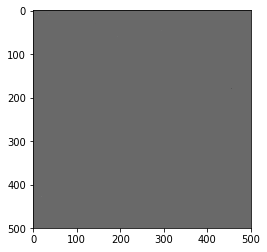

In [21]:
Quotient = im / G
print(Quotient)
plot.imshow(Quotient,'gray')




(1296, 1936, 3)


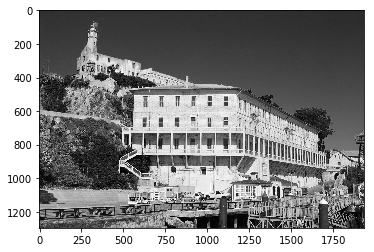

In [27]:
import cv2
import numpy as np

img = cv2.imread("./Pictures/alcatraz1.jpg") # Read in the image
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = img[:,:,0]

plot.imshow(gray,'gray')


(1296, 1936, 3)


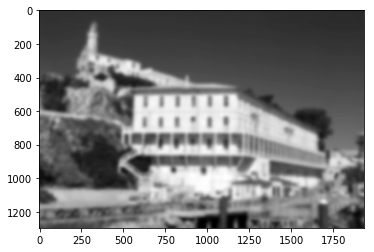

In [25]:
G = filters.gaussian_filter(gray,10)
plot.imshow(G,'gray')



[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


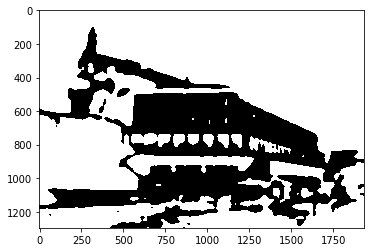

In [30]:
Unsharpen = G*2/G
print(Unsharpen)
plot.imshow(Unsharpen,'gray')


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 1 3]
 [1 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 1]]


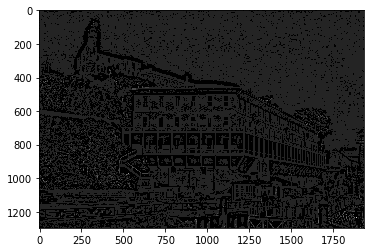

In [26]:
Unsharpen = gray / G
print(Unsharpen)
plot.imshow(Unsharpen,'gray')

/home/resident/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


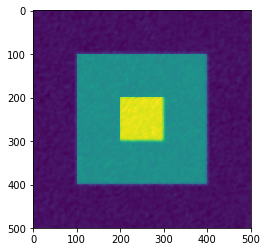

In [16]:
U,T = denoise(im,im)
plot.imshow(U)

import scipy.misc
scipy.misc.imsave("synth_rof.pdf",U)

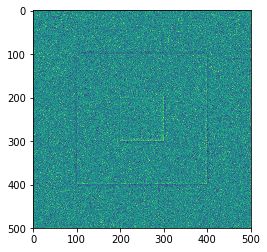

In [17]:
plot.imshow(T)

In [3]:
from scipy.ndimage import filters

def compute_harris_response(im,sigma=3):
    """ Compute the Harris corner detector response function
    for each pixel in a graylevel image. """

    # derivatives
    imx = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
    imy = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)
    
    # compute components of the Harris matrix
    Wxx = filters.gaussian_filter(imx*imx,sigma)
    Wxy = filters.gaussian_filter(imx*imy,sigma)
    Wyy = filters.gaussian_filter(imy*imy,sigma)

    # determinant and trace
    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx + Wyy
    return Wdet / Wtr



In [4]:
def get_harris_points(harrisim,min_dist=10,threshold=0.1):
    
    """ Return corners from a Harris response image
    min_dist is the minimum number of pixels separating
    corners and image boundary. """

    # find top corner candidates above a threshold
    corner_threshold = harrisim.max() * threshold
    harrisim_t = (harrisim > corner_threshold) * 1

    # get coordinates of candidates
    coords = array(harrisim_t.nonzero()).T

    # ...and their values
    candidate_values = [harrisim[c[0],c[1]] for c in coords]

    # sort candidates
    index = argsort(candidate_values)

    # store allowed point locations in array
    allowed_locations = zeros(harrisim.shape)
    allowed_locations[min_dist:-min_dist,min_dist:-min_dist] = 1

    # select the best points taking min_distance into account
    filtered_coords = []

    for i in index:
        if allowed_locations[coords[i,0],coords[i,1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist),
                (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0

    return filtered_coords

In [5]:
import matplotlib.pyplot as plot
%matplotlib inline
from pylab import *

def plot_harris_points(image,filtered_coords):

    """ Plots corners found in image. """
    figure()
    gray()
    imshow(image)
    plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords],"*")
    axis("off")
    show()
    
    

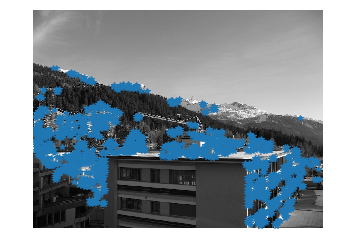

In [6]:
from numpy import *
from PIL import Image

im = array(Image.open("./crans_1_small.jpg").convert("L"))
harrisim = compute_harris_response(im)
filtered_coords = get_harris_points(harrisim,6)
plot_harris_points(im, filtered_coords)

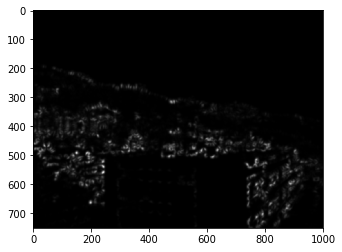

In [7]:
from scipy.ndimage import filters

""" Compute the Harris corner detector response function
for each pixel in a graylevel image. """

im = array(Image.open("./crans_1_small.jpg").convert("L"))
    
# derivatives
sigma = 3
imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma, sigma), (0, 1), imx)

imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma, sigma), (1, 0), imy)

# compute components of the Harris matrix
Wxx = filters.gaussian_filter(imx * imx, sigma)
Wxy = filters.gaussian_filter(imx * imy, sigma)
Wyy = filters.gaussian_filter(imy * imy, sigma)

# determinant and trace
Wdet = Wxx * Wyy - Wxy ** 2
Wtr = Wxx + Wyy

imshow(Wdet / Wtr)

#return Wdet / Wtr


In [8]:

def get_descriptors(image,filtered_coords,wid=5):
    """ For each point return pixel values around the point
    using a neighbourhood of width 2*wid+1. (Assume points are
    extracted with min_distance > wid). """

    desc = []
    for coords in filtered_coords:
        patch = image[coords[0]-wid:coords[0]+wid+1,
            coords[1]-wid:coords[1]+wid+1].flatten()
        desc.append(patch)
    return desc

In [9]:
def match(desc1,desc2,threshold=0.5):
    """ For each corner point descriptor in the first image,
    select its match to second image using
    normalized cross correlation. """

    n = len(desc1[0])

    # pair-wise distances
    d = -ones((len(desc1),len(desc2)))
    for i in range(len(desc1)):
        for j in range(len(desc2)):
            d1 = (desc1[i] - mean(desc1[i])) / std(desc1[i])
            d2 = (desc2[j] - mean(desc2[j])) / std(desc2[j])
            ncc_value = sum(d1 * d2) / (n-1)
            
            if ncc_value > threshold:
                d[i,j] = ncc_value
            
    ndx = argsort(-d)
    matchscores = ndx[:,0]
    return matchscores

In [10]:
def match_twosided(desc1,desc2,threshold=0.5):
    """ Two-sided symmetric version of match(). """

    matches_12 = match(desc1,desc2,threshold)
    matches_21 = match(desc2,desc1,threshold)
   
    ndx_12 = where(matches_12 >= 0)[0]

    # remove matches that are not symmetric
    for n in ndx_12:
        if matches_21[matches_12[n]] != n:
            matches_12[n] = -1
   
    return matches_12



In [11]:
def appendimages(im1,im2):
    """ Return a new image that appends the two images side-by-side. """

    # select the image with the fewest rows and fill in enough empty rows    
    rows1 = im1.shape[0]
    rows2 = im2.shape[0]
    
    if rows1 < rows2:
      im1 = concatenate((im1,zeros((rows2-rows1,im1.shape[1]))),axis=0)
    elif rows1 > rows2:
      im2 = concatenate((im2,zeros((rows1-rows2,im2.shape[1]))),axis=0)
    
    # if none of these cases they are equal, no filling needed.
    return concatenate((im1,im2), axis=1)




In [12]:
def plot_matches(im1,im2,locs1,locs2,matchscores,show_below=True):
    """ Show a figure with lines joining the accepted matches
    input: im1,im2 (images as arrays), locs1,locs2 (feature locations),
    matchscores (as output from ’match()’),
    show_below (if images should be shown below matches). """

    im3 = appendimages(im1,im2)
    if show_below:
        im3 = vstack((im3,im3))

    imshow(im3)

    cols1 = im1.shape[1]
    for i,m in enumerate(matchscores):
        if m>0:
            plot([locs1[i][1],locs2[m][1]+cols1],[locs1[i][0],locs2[m][0]],'c')
    axis('off')

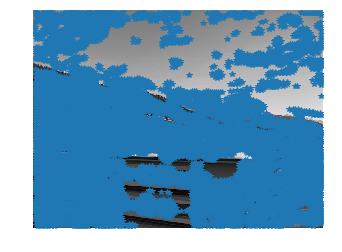

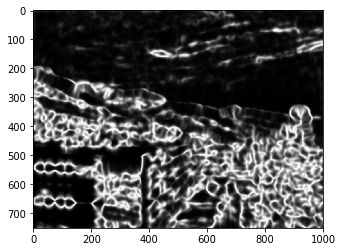

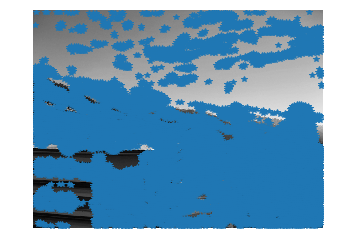

starting matching


KeyboardInterrupt: 

In [2]:
from scipy.ndimage import filters
from PIL import Image
from numpy import *
from pylab import *
import harris

im1 = array(Image.open("./crans_1_small.jpg").convert("L"))
im2 = array(Image.open("./crans_2_small.jpg").convert("L"))


wid = 5
harrisim = harris.compute_harris_response(im1,5)
filtered_coords1 = harris.get_harris_points(harrisim,wid+1)
d1 = harris.get_descriptors(im1,filtered_coords1,wid)
harris.plot_harris_points(im1, filtered_coords1)

harrisim = harris.compute_harris_response(im2,5)
filtered_coords2 = harris.get_harris_points(harrisim,wid+1)
d2 = harris.get_descriptors(im2,filtered_coords2,wid)
imshow(harrisim,'gray')
harris.plot_harris_points(im2, filtered_coords2)

print 'starting matching'
matches = harris.match_twosided(d1,d2)
print(matches)

print 'plot matching'
figure()
gray()
harris.plot_matches(im1,im2,filtered_coords1,filtered_coords2,matches)
show()

In [13]:
from scipy.ndimage import filters
from PIL import Image
from numpy import *
#from pylab import *
#import harris

im1 = array(Image.open("./crans_1_small.jpg").convert("L"))
im2 = array(Image.open("./crans_2_small.jpg").convert("L"))

wid = 5
harrisim = compute_harris_response(im1,5)
filtered_coords1 = get_harris_points(harrisim,wid+1)
d1 = get_descriptors(im1,filtered_coords1,wid)
#plot_harris_points(im1, filtered_coords1)

harrisim = compute_harris_response(im2,5)
filtered_coords2 = get_harris_points(harrisim,wid+1)
d2 = get_descriptors(im2,filtered_coords2,wid)
#plot_harris_points(im2, filtered_coords2)

desc1 = d1
desc2 = d2
print(len(d1))

n = len(d1[0])
print(n)

#print((desc1[0]))
#print(desc1[0] - mean(desc1[0]))
#print((desc1[0] - mean(desc1[0])) / std(desc1[0]))
threshold = 0.5

# pair-wise distances
d = -ones((len(desc1),len(desc2)))
print(len(d))


d1 = (desc1[0] - mean(desc1[0])) / std(desc1[0])
d2 = (desc2[0] - mean(desc2[0])) / std(desc2[0])
#print(sum(d1 * d2))
#print(sum(d1 * d2) / (n-1))

ncc_value = sum(d1 * d2) / (n-1)
print(ncc_value)

for i in range(len(desc1)):
    for j in range(len(desc2)):
        d1 = (desc1[i] - mean(desc1[i])) / std(desc1[i])
        d2 = (desc2[j] - mean(desc2[j])) / std(desc2[j])
        ncc_value = sum(d1 * d2) / (n-1)

        if ncc_value > threshold:
            d[i,j] = ncc_value

print(len(d))            
            
#ndx = argsort(-d)
#matchscores = ndx[:,0]


1637
121
1637
0.12401332512648322
1637


In [1]:
# anaconda ms code


In [10]:
from PIL import Image
import os
from numpy import *
from pylab import *


def process_image(imagename,resultname,params="--edge-thresh 10 --peak-thresh 5"):
    """ Process an image and save the results in a file. """
    print 'imagename:', imagename, ' to:', resultname

    if imagename[-3:] != 'pgm':
        # create a pgm file
        im = Image.open(imagename).convert('L')
        im.save('tmp.pgm')
        imagename = 'tmp.pgm'

    cmmd = str("sift "+imagename+" --output="+resultname+
                " "+params)
    os.system(cmmd)
    print 'processed', imagename, 'to', resultname


SyntaxError: Missing parentheses in call to 'print'. Did you mean print('imagename:', imagename, ' to:', resultname)? (<ipython-input-10-db393b704e4a>, line 9)

In [4]:
def read_features_from_file(filename):
    """ Read feature properties and return in matrix form. """
    
    f = loadtxt(filename)
    return f[:,:4],f[:,4:] # feature locations, descriptors


def write_features_to_file(filename,locs,desc):
    """ Save feature location and descriptor to file. """
    savetxt(filename,hstack((locs,desc)))
    

def plot_features(im,locs,circle=False):
    """ Show image with features. input: im (image as array), 
        locs (row, col, scale, orientation of each feature). """

    def draw_circle(c,r):
        t = arange(0,1.01,.01)*2*pi
        x = r*cos(t) + c[0]
        y = r*sin(t) + c[1]
        plot(x,y,'b',linewidth=2)

    imshow(im)
    if circle:
        for p in locs:k
            draw_circle(p[:2],p[2]) 
    else:
        plot(locs[:,0],locs[:,1],'ob')
    axis('off')

In [9]:
import sift
imname = "empire.jpg"
im1 = array(Image.open(imname).convert("L"))
process_image(imname,'empire.sift')
l1,d1 = read_features_from_file('empire.sift')
figure()
gray()
plot_features(im1,l1,circle=True)
show()

imagename: empire.jpg  to: empire.sift
processed tmp.pgm to empire.sift


IOError: empire.sift not found.

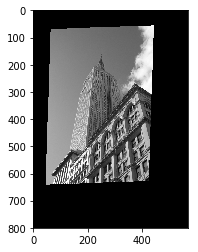

In [11]:
from scipy import ndimage
im = array(Image.open('empire.jpg').convert('L'))
H = array([[1.4,0.05,-100],[0.05,1.5,-100],[0,0,1]])
im2 = ndimage.affine_transform(im,H[:2,:2],(H[0,2],H[1,2]))
figure()
gray()
imshow(im2)
show()

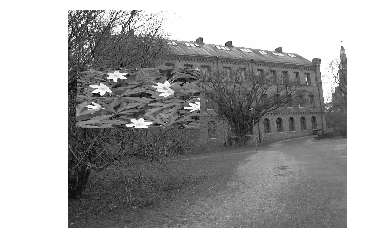

In [32]:
import warp
# example of affine warp of im1 onto im2
im1 = array(Image.open('flower32_t0.png').convert('L'))
im2 = array(Image.open('Univ5.jpg').convert('L'))
# set to points

tp = array([[264,538,540,264],[40,36,605,605],[1,1,1,1]])
im3 = warp.image_in_image(im1,im2,tp)
figure()
gray()
imshow(im3)
axis('equal')
axis('off')
show()

In [28]:
#import matplotlib.delaunay as triang
import matplotlib.tri as mtri
import pylab
import numpy
from scipy.spatial import Delaunay

# 10 random points (x,y) in the plane
#x,y =  numpy.array(numpy.random.standard_normal((2,10)))
#print(x,y)
#tri = mtri.Triangulation(x,y)
#print(tri)

h = 700
w = 700
npts = 500
pts = np.zeros((npts,2))
pts[:,0] = np.random.randint(0,w,npts)
pts[:,1] = np.random.randint(0,h,npts)

tri = Delaunay(pts)
centers = np.sum(pts[tri.simplices], axis=1, dtype='int')/3.0


for t in tri:
 # t[0], t[1], t[2] are the points indexes of the triangle
 t_i = [t[0], t[1], t[2], t[0]]
 #pylab.plot(x[t_i],y[t_i])

#pylab.plot(x,y,'o')
#pylab.show()


(array([-0.20499449,  1.21236337,  2.59516512,  0.24434375,  0.03103282,
       -0.50552968, -0.87449625,  0.7071255 , -0.01605382,  0.20994071]), array([-1.65846464,  0.32822607,  1.42641704, -0.28838147, -1.1217729 ,
        1.41552013,  0.23485797, -0.4158403 , -0.46285149,  0.30042215]))


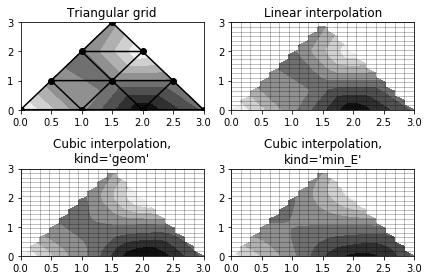

In [15]:
"""
Interpolation from triangular grid to quad grid.
"""
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np

# Create triangulation.
x = np.asarray([0, 1, 2, 3, 0.5, 1.5, 2.5, 1, 2, 1.5])
y = np.asarray([0, 0, 0, 0, 1.0, 1.0, 1.0, 2, 2, 3.0])
triangles = [[0, 1, 4], [1, 2, 5], [2, 3, 6], [1, 5, 4], [2, 6, 5], [4, 5, 7],
             [5, 6, 8], [5, 8, 7], [7, 8, 9]]
triang = mtri.Triangulation(x, y, triangles)

# Interpolate to regularly-spaced quad grid.
z = np.cos(1.5*x)*np.cos(1.5*y)
xi, yi = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 3, 20))

interp_lin = mtri.LinearTriInterpolator(triang, z)
zi_lin = interp_lin(xi, yi)

interp_cubic_geom = mtri.CubicTriInterpolator(triang, z, kind='geom')
zi_cubic_geom = interp_cubic_geom(xi, yi)

interp_cubic_min_E = mtri.CubicTriInterpolator(triang, z, kind='min_E')
zi_cubic_min_E = interp_cubic_min_E(xi, yi)


# Plot the triangulation.
plt.subplot(221)
plt.tricontourf(triang, z)
plt.triplot(triang, 'ko-')
plt.title('Triangular grid')

# Plot linear interpolation to quad grid.
plt.subplot(222)
plt.contourf(xi, yi, zi_lin)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Linear interpolation")

# Plot cubic interpolation to quad grid, kind=geom
plt.subplot(223)
plt.contourf(xi, yi, zi_cubic_geom)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Cubic interpolation,\nkind='geom'")

# Plot cubic interpolation to quad grid, kind=min_E
plt.subplot(224)
plt.contourf(xi, yi, zi_cubic_min_E)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Cubic interpolation,\nkind='min_E'")

plt.tight_layout()
plt.show()

In [27]:
from matplotlib import pyplot as plt
import matplotlib
from skimage import io
from scipy.spatial import Delaunay
import numpy as np
from PIL import Image
from scipy.ndimage import rotate

h = 700
w = 700
npts = 500
pts = np.zeros((npts,2))
pts[:,0] = np.random.randint(0,w,npts)
pts[:,1] = np.random.randint(0,h,npts)

tri = Delaunay(pts)
centers = np.sum(pts[tri.simplices], axis=1, dtype='int')/3.0
print(centers)


#plt.figure()
#fig, ax = plt.subplots()
#plt.xlim(0, w)
#plt.ylim(0, h)


#for i in range(0,len(pts[tri.simplices])-1):
#    temp_tri = plt.Polygon(pts[tri.simplices][i], color = colors[i]/256) #colors variable is a numpy.ndarray variable that contains RGB values
#    plt.gca().add_patch(temp_tri)

#plt.gca().set_aspect('equal')
#plt.axis('off')

#plt.savefig('test.pdf', bbox_inches = 'tight', dpi=fig.dpi)
plt.show()

[[696.33333333 472.66666667]
 [  8.66666667 285.66666667]
 [  3.66666667 341.33333333]
 ...
 [325.66666667  64.33333333]
 [297.33333333  36.66666667]
 [296.66666667  58.        ]]


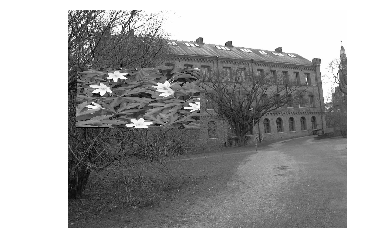

In [19]:
from pylab import *
from numpy import *
from PIL import Image
import homography
import warp

tp = array([[264,538,540,264],[40,36,605,605],[1,1,1,1]])

# example of affine warp of im1 onto im2
im1 = array(Image.open('flower32_t0.png').convert('L'))
im2 = array(Image.open('Univ5.jpg').convert('L'))

# set from points to corners of im1
m,n = im1.shape[:2]
fp = array([[0,m,m,0],[0,0,n,n],[1,1,1,1]])

# first triangle
tp2 = tp[:,:3]
fp2 = fp[:,:3]

# compute H
H = homography.Haffine_from_points(tp2,fp2)
im1_t = ndimage.affine_transform(im1,H[:2,:2],(H[0,2],H[1,2]),im2.shape[:2])

# alpha for triangle
alpha = warp.alpha_for_triangle(tp2,im2.shape[0],im2.shape[1])
im3 = (1-alpha)*im2 + alpha*im1_t

# second triangle
tp2 = tp[:,[0,2,3]]
fp2 = fp[:,[0,2,3]]

# compute H
H = homography.Haffine_from_points(tp2,fp2)
im1_t = ndimage.affine_transform(im1,H[:2,:2],(H[0,2],H[1,2]),im2.shape[:2])

# alpha for triangle
alpha = warp.alpha_for_triangle(tp2,im2.shape[0],im2.shape[1])
im4 = (1-alpha)*im3 + alpha*im1_t
figure()
gray()
imshow(im4)
axis('equal')
axis('off')
show()



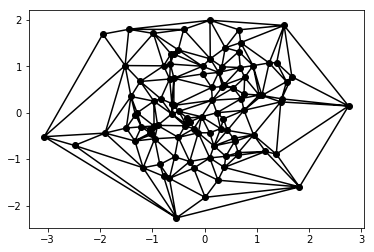

In [23]:
import matplotlib.tri as mtri
import matplotlib.pyplot as plt

x,y = array(random.standard_normal((2,100)))
triang = mtri.Triangulation(x,y)
figure()

plt.triplot(triang, 'ko-')
plt.show()